In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import h5py  
import pandas as pd
import numpy as np
import os

In [2]:

df = pd.read_pickle("../TESTS/dataframe_POP_LME_5_random_trn4_tst20_2024-Jan-20_at_15-06.pkl")

In [3]:
tests_dir = "../TESTS/"
test_file = "POP_LME_5_random_trn4_tst20_2024-Jan-20_at_15-06.h5"

def read_gammas(filename, tests_dir):
    
    with h5py.File(tests_dir+filename, "r") as f:
    
        gammas = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']
        
        relaxation = []
        de_phasing = []
        #exitation = []
        de_polarisation = []
        omega = []

               
        for gamma in gammas:

            relaxation.append(f["gamma_"+gamma]["gamma_relaxation"][()])
            de_phasing.append(f["gamma_"+gamma]["gamma_de_phasing"][()])
            #exitation.append(f["gamma_"+gamma]["gamma_exitation"][()])
            de_polarisation.append(f["gamma_"+gamma]["gamma_de_polarisation"][()])
            omega.append(f["gamma_"+gamma]["omega"][()])
            
            print(gamma)

    return gammas, omega, relaxation, de_phasing, de_polarisation  # exitation

gammas, omega, relaxation, de_phasing, de_polarisation = read_gammas(test_file, tests_dir)

0.079477
0.25133
0.79477
2.5133
7.9477
25.133
79.477
251.33


In [4]:
df

,Gamma,State,Time,gt,Fidelity,Infidelity,Distance
0,0.079477,1,0.06000,0.004769,1.000000,-6.039613e-14,0.341925
1,0.079477,1,0.08000,0.006358,0.999997,2.684201e-06,0.341925
2,0.079477,1,0.10000,0.007948,0.999982,1.772077e-05,0.341925
3,0.079477,1,0.12000,0.009537,0.999972,2.784747e-05,0.341925
4,0.079477,1,0.14000,0.011127,0.999986,1.357446e-05,0.341925
...,...,...,...,...,...,...,...
751,79.477,20,0.23800,18.915526,0.999089,9.109646e-04,0.340013
752,79.477,20,0.23825,18.935395,0.999087,9.125706e-04,0.340013
753,79.477,20,0.23850,18.955264,0.999086,9.140643e-04,0.340013
754,79.477,20,0.23875,18.975134,0.999085,9.154436e-04,0.340013


In [5]:
df[df.Gamma == "0.079477"].Fidelity.min()

0.9990530106682178

In [6]:
gammas = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']

df.replace(to_replace= '0.079477', value = '0.079', inplace=True )
df.replace(to_replace= '0.79477', value = '0.795', inplace=True )
df.replace(to_replace= '0.25133', value = '0.251', inplace=True )
df.replace(to_replace= '2.5133', value = '2.513', inplace=True )
df.replace(to_replace= '7.9477', value = '7.948', inplace=True )

df['Gamma'] = df['Gamma'].astype(float)

df['Infidelity'] = df['Infidelity'].abs()

df['Log_Infidelity'] = np.log10(df['Infidelity'])

df.loc[df["Log_Infidelity"] < -12, "Log_Infidelity"] = -12

pd.unique(df["Gamma"])

/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([7.9000e-02, 2.5100e-01, 7.9500e-01, 2.5130e+00, 2.5133e+01,
       2.5133e+02, 7.9480e+00, 7.9477e+01])

In [7]:
def log_infidelity_from_gamma(df, title):
   
    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    
    sns.violinplot(ax=ax, data=df, x="Gamma", y="Log_Infidelity", cut = 0, # hue = "Method", split=True,
                        scale="width", palette ="cool", linewidth=0.5,
                        inner= None, bw="silverman")
    
    ymin = -6
    ymax = -0.1
    
    tick_range = np.arange(ymin, ymax)
    ax.yaxis.set_ticks(tick_range, [r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$',])
    ax.yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

    ax.set_title(title)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel(r'Coupling $\gamma$')
    ax.set_ylabel(r'Infidelity $(1-F)$')
    
    ax.hlines(y=np.log10(.01), xmin=-0.5, xmax=7.1, colors='black', linestyles='--', alpha=0.8)
    ax.text(7.2, np.log10(.01), '0.01', ha='left', va='center')
    
    ax.hlines(y=np.log10(.02), xmin=-0.5, xmax=7.1, colors='black', linestyles='--', alpha=0.8)
    ax.text(7.2, np.log10(.02), '0.02', ha='left', va='center')
 
    return fig

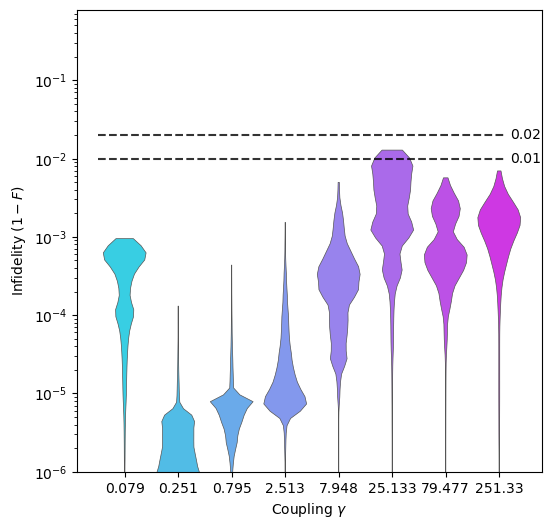

In [8]:
fig = log_infidelity_from_gamma(df, "")

In [9]:
fig.savefig("LogInfidelity_LME_5.pdf")